In [24]:
import bagpy
import rosbag
from bagpy import bagreader
import os
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
# bag_path = os.path.join('../test/testdata', 'chunk_0003.bag')
bag_path = os.path.join('../test/testdata', 'gmapping_test_0003.bag') # has vel data only
# bag_path = os.path.join('../test/testdata', 'rtabmap_test_0003.bag') # has odom data only
# bag_path = 'gmapping_data.bag'
bag_path

'../test/testdata/gmapping_test_0003.bag'

In [12]:
b = bagreader(bag_path)
csvfiles = []
for t in b.topics:
    data = b.message_by_topic(t)
    csvfiles.append(data)

[INFO]  Successfully created the data folder ../test/testdata/gmapping_test_0003.


In [13]:
csvfiles

['../test/testdata/gmapping_test_0003/clock.csv',
 '../test/testdata/gmapping_test_0003/cmd_vel.csv',
 '../test/testdata/gmapping_test_0003/move_base-TrajectoryPlannerROS-global_plan.csv',
 '../test/testdata/gmapping_test_0003/move_base-TrajectoryPlannerROS-local_plan.csv',
 '../test/testdata/gmapping_test_0003/move_base-global_costmap-costmap_updates.csv',
 '../test/testdata/gmapping_test_0003/mybot-laser-scan.csv',
 '../test/testdata/gmapping_test_0003/particlecloud.csv',
 '../test/testdata/gmapping_test_0003/tf.csv']

In [14]:
b.topic_table

,Topics,Types,Message Count,Frequency
0,/clock,rosgraph_msgs/Clock,112,100.0
1,/cmd_vel,geometry_msgs/Twist,23,20.0
2,/move_base/TrajectoryPlannerROS/global_plan,nav_msgs/Path,23,20.0
3,/move_base/TrajectoryPlannerROS/local_plan,nav_msgs/Path,23,20.0
4,/move_base/global_costmap/costmap_updates,map_msgs/OccupancyGridUpdate,1,NaN
5,/mybot/laser/scan,sensor_msgs/LaserScan,107,NaN
6,/particlecloud,geometry_msgs/PoseArray,1,NaN
7,/tf,tf2_msgs/TFMessage,123,NaN


In [21]:
laser_data = b.vel_data()
velocity_cleaned = pd.read_csv(laser_data[0])

In [22]:
velocity_cleaned

,Time,linear.x,linear.y,linear.z,angular.x,angular.y,angular.z
0,44.58,0.5,0.0,0.0,0.0,0.0,0.052632
1,44.62,0.5,0.0,0.0,0.0,0.0,0.052632
2,44.68,0.5,0.0,0.0,0.0,0.0,0.000000
3,44.72,0.5,0.0,0.0,0.0,0.0,0.000000
4,44.78,0.5,0.0,0.0,0.0,0.0,0.052632
5,44.83,0.5,0.0,0.0,0.0,0.0,0.052632
6,44.88,0.5,0.0,0.0,0.0,0.0,0.052632
7,44.92,0.5,0.0,0.0,0.0,0.0,0.052632
8,44.98,0.5,0.0,0.0,0.0,0.0,0.052632
9,45.02,0.5,0.0,0.0,0.0,0.0,0.052632


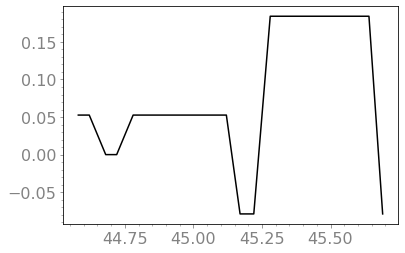

In [26]:
plt.plot(velocity_cleaned['Time'], velocity_cleaned['angular.z'], color='black')


In [10]:
# msg_file = pd.read_csv(b.message_by_topic(topic='/mybot/laser/scan'))
# msg_file